In [8]:
import numpy as np

l1=202 #milimetros
l2=160
l3=195
l4=67.15
l5=120 #herramienta

#se considera posicion inicial todo hacia arriba

In [9]:
def CD(Q):

    Q=np.array(Q)/180*np.pi

    C1 = np.cos(Q[0])
    C2 = np.cos(Q[1])
    cosq3 = np.cos(Q[2])
    C4 = np.cos(Q[3])
    C5 = np.cos(Q[4])
    C6 = np.cos(Q[5])

    S1 = np.sin(Q[0])
    S2 = np.sin(Q[1])
    S3 = np.sin(Q[2])
    S4 = np.sin(Q[3])
    S5 = np.sin(Q[4])
    S6 = np.sin(Q[5])

    L1 = l1
    L2 = l2
    L3 = l3
    L4 = l4

    A1=np.array([[C1,0,S1,0],[S1,0,-C1,0],[0,1,0,L1],[0,0,0,1]])
    A2=np.array([[-S2,-C2,0,-L2*S2],[C2,-S2,0,L2*C2],[0,0,1,0],[0,0,0,1]])
    A3=np.array([[S3,0,cosq3,0],[-cosq3,0,S3,0],[0,-1,0,0],[0,0,0,1]])
    A4=np.array([[C4,0,S4,0],[S4,0,-C4,0],[0,1,0,L3],[0,0,0,1]])
    A5=np.array([[C5,0,-S5,0],[S5,0,C5,0],[0,-1,0,0],[0,0,0,1]])
    A6=np.array([[C6,-S6,0,0],[S6,C6,0,0],[0,0,1,L4],[0,0,0,1]])

    T=np.matmul(np.matmul(A1,A2),np.matmul(np.matmul(A3,A4),np.matmul(A5,A6))).round(decimals=3)

    return [T[0:3,0:3],T[0:3,3]]
    #return T

In [10]:
#pruebas Cinematica directa
print(CD([0,0,0,0,0,0]))
print(CD([0,0,90,0,0,0]))

[array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([  0.  ,   0.  , 624.15])]
[array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]]), array([-262.15,    0.  ,  362.  ])]


In [13]:

def CI(p,rot=[[1,0,0],[0,1,0],[0,0,1]],codo=+1,signoQ3=-1,pM=0,euler=0):

  #q1 -180 a 180
  #q2 -90 a 90
  #q3 -90 a 90
  #q4 -180 a 180
  #q5 -90 a 90
  #q6 -180 a 180
  if euler!=0:
    alpha=euler[0]*np.pi/180.0
    beta=euler[1]*np.pi/180.0
    gamma=euler[2]*np.pi/180.0
    rot=[[np.cos(alpha)*np.cos(beta),np.cos(alpha)*np.sin(beta)*np.sin(gamma)-np.sin(alpha)*np.cos(gamma),np.cos(alpha)*np.sin(beta)*np.cos(gamma)+np.sin(alpha)*np.sin(gamma)],[np.sin(alpha)*np.cos(beta),np.sin(alpha)*np.sin(beta)*np.sin(gamma)+np.cos(alpha)*np.cos(gamma),np.sin(alpha)*np.sin(beta)*np.cos(gamma)-np.cos(alpha)*np.sin(gamma)],[-np.sin(beta),np.cos(beta)*np.sin(gamma),np.cos(beta)*np.cos(gamma)]]

  n=rot[0]
  o=rot[1]
  a=rot[2]
  if pM:
    if p[2]<l4:
      print("fuera del rango")
      return None
    pmx=p[0]
    pmy=p[1]
    pmz=p[2] -l1
  else:
    pmx=p[0]-l4*a[0]
    pmy=p[1]-l4*a[1]
    pmz=p[2]-l4*a[2] -l1

  #q1
  q1=np.arctan2(pmy,pmx)
  if q1 > np.pi or q1 < -np.pi:
    print("fuera del rango")
    return None
  #

  #q3

  cosq3=(pmx**2+pmy**2+pmz**2-l2**2-l3**2)/(2*l2*l3)
  S3=(signoQ3)*np.sqrt(1-cosq3**2)
  q3=np.arctan2(S3,cosq3)
  if q3 > np.pi/1.9 or q3 < -np.pi/1.9:
    signoQ3*=-1
    S3=(signoQ3)*np.sqrt(1-cosq3**2)
    q3=np.arctan2(S3,cosq3)
    if q3 > np.pi/1.9 or q3 < -np.pi/1.9:
      print("fuera del rango")
      return None
  #
  #q2
  #-1
  q2=(np.arctan2(pmz,(codo*np.sqrt(pmx**2+pmy**2))) - np.arctan2((l3*S3),(l2+l3*cosq3)))-np.pi/2
  if q2 > np.pi/1.9 or q2 < -np.pi/1.9:
    codo*=-1
    q2=(np.arctan2(pmz,(codo*np.sqrt(pmx**2+pmy**2))) - np.arctan2((l3*S3),(l2+l3*cosq3)))-np.pi/2
    if q2 > np.pi/1.9 or q2 < -np.pi/1.9:
      print("fuera del rango")
      return None
  #
  
  if pM:
     return (np.array([q1,q2,q3])*180/np.pi).round(decimals=3)


  C1=np.cos(q1)
  C2=np.cos(q2)
  S1=np.sin(q1)
  S2=np.sin(q2)

  q5=np.arccos(-a[0]*C1*(C2*S3+cosq3*S2)-a[1]*S1*(C2*S3+cosq3*S2)+a[2]*(C2*cosq3-S2*S3))
  if q5 > np.pi/2 or q5 < -np.pi/2:
    print("Q5 fuera del rango")
    return None
  S5=np.sin(q5)

  q4=np.arctan2((C1*a[1]-S1*a[0]),abs(a[2]*(C2*S3+cosq3*S2)+(C2*cosq3-S2*S3)*(a[1]*S1+a[0]*C1)))

  S4=np.sin(q4)
  C4=np.cos(q4)

  q6=np.arcsin(n[0]*(-2*C4*S1+C1*S4*(-C2*cosq3+S2*S3))+n[1]*(C1*C4+S1*S4*(S2*S3-C2*cosq3))-n[2]*S4*(C2*S3+cosq3*S2))

  return (np.array([q1,q2,q3,q4,q5,q6])*180/np.pi).round(decimals=3)

In [14]:
#pruebas Cinematica inversa
print(CI([0,0,l1+l2+l3+l4]))
print(CI([l3+l4,0,l1+l2],[[ 0.,  0., 1.],[ 0.,  1.,  0.],[ 1.,  0.,  0.]]))
print(CI([-l3-l4,0,l1+l2],[[ 0.,  0., 1.],[ 0.,  1.,  0.],[ -1.,  0.,  0.]]))
print(CI([l3+l4,0,l1+l2],euler=[0,-90,0]))
print(CI([-l3-l4,0,l1+l2],euler=[0,90,0]))
print(CI([0,0,l1+l2+l3+l4],euler=[0,0,0]))
print(CI([0,0,l1+l2+l3+l4-10],euler=[0,0,0]))

[ 0.  0. -0.  0.  0.  0.]
[  0.   0. -90.   0.   0.   0.]
[180.      0.    -90.     30.144   0.     30.144]
[  0.   0. -90.   0.   0.  -0.]
[180.      0.    -90.     39.294   0.     39.294]
[ 0.  0. -0.  0.  0.  0.]
[  0.     15.076 -27.399   0.     12.323   0.   ]


In [ ]:
#pruebas numpy
print(np.arctan2(-1,-1)*180/np.pi)
print(np.arctan2(1,-1)*180/np.pi)
print(np.arctan2(-1,1)*180/np.pi)
print(np.arctan2(0,-1)*180/np.pi)
print(np.arctan(0)*180/np.pi)

-135.0
135.0
-45.0
180.0
0.0


#Interpolador spline cubico

In [ ]:
vMA1=40.0
vMA2=10.0
vMA3=10.0
vMA4=40.0
vMA5=10.0
vMA6=10.0 #grados/segundo

pasos=200

gradosApasosA1=(pasos/360.0)*5.0*16.0
gradosApasosA2=16.875*16.0
gradosApasosA3=16.5625*16.0
gradosApasosA4=(pasos/360.0)*2.0*16.0
gradosApasosP1=(pasos/360.0)*2.0*16.0
gradosApasosP2=(pasos/360.0)*2.0*16.0

print(gradosApasosA1,1/gradosApasosA1)
print(gradosApasosA2,1/gradosApasosA2)
print(gradosApasosA3,1/gradosApasosA3)
print(gradosApasosA4,1/gradosApasosA4)
print(gradosApasosP1,1/gradosApasosP1)
print(2*gradosApasosP2,1/(2*gradosApasosP2))



44.44444444444444 0.0225
270.0 0.003703703703703704
265.0 0.0037735849056603774
17.77777777777778 0.056249999999999994
17.77777777777778 0.056249999999999994
35.55555555555556 0.028124999999999997


In [ ]:
def tMax(Pi,Pia):
   if len(Pi)==3:
      v1=vMA1/2
      v2=vMA2/2
      v3=vMA3/2
      return max(abs((Pi[0]-Pia[0])/v1),abs((Pi[1]-Pia[1])/v2),abs((Pi[2]-Pia[2])/v3))

In [ ]:
#intento fallido
aux=["STR","50","50", "450", "0", "0" ,"557", 50,50 ,450,0,0,557]

STR=[]
STRQ=[]
try:
  for i in range(min(30,int((len(aux)-1)/3))):
    STR.append([float(aux[1+i*3]),float(aux[2+i*3]),float(aux[3+i*3])])
    out=CI(STR[i],pM=1)
    if type(out)==type(None):
      print(STR[i]," No esta en el espacio de la tarea")
      raise ValueError("Fuera de rango")
    STRQ.append(out)
  STRQI=[]
  v1a=0
  v2a=0
  v3a=0
  Ta=1
  tcs=[0]
  Qcs1=[STRQ[0][0]]
  Qcs2=[STRQ[0][1]]
  Qcs3=[STRQ[0][2]]
  for i in range(1,len(STRQ)):
      STRQI.append(STRQ[i-1])
      Pi=STRQ[i]
      Pia=STRQ[i-1]

      T=tMax(Pi,Pia)
      tcs.append(tcs[-1]+T)
      Qcs1.append(STRQ[i][0])
      Qcs2.append(STRQ[i][1])
      Qcs3.append(STRQ[i][2])
      #T=1
      cantPuntos=int(min(abs(Pi[0]-Pia[0]),abs(Pi[1]-Pia[1]),abs(Pi[2]-Pia[2])))
      if T!=0:
        if i>1:
          v1=((Pi[0]-Pia[0])/T+ (Pia[0]-STRQ[i-2][0])/Ta)/2
          v2=((Pi[1]-Pia[1])/T+ (Pia[1]-STRQ[i-2][1])/Ta)/2
          v3=((Pi[2]-Pia[2])/T+ (Pia[2]-STRQ[i-2][2])/Ta)/2
        else:
          v1=(Pi[0]-Pia[0])/T
          v2=(Pi[1]-Pia[1])/T
          v3=(Pi[2]-Pia[2])/T
      if cantPuntos!=0:
        for j in np.arange(0,T,T/cantPuntos):
          q1=Pia[0] + v1a*j + j**2*(3*(v1-v1a)/T-2*v1a-v1)/T + j**3*(-2*(v1-v1a)/T**3 +(v1a+v1)/T**2)
          q2=Pia[1] + v2a*j + j**2*(3*(v2-v2a)/T-2*v2a-v2)/T + j**3*(-2*(v2-v2a)/T**3 +(v2a+v2)/T**2)
          q3=Pia[2] + v3a*j + j**2*(3*(v3-v3a)/T-2*v3a-v3)/T + j**3*(-2*(v3-v3a)/T**3 +(v3a+v3)/T**2)
          STRQI.append([q1,q2,q3])
        v1a=v1
        v2a=v2
        v3a=v3
        Ta=T
  STRQI.append(STRQ[-1])

except Exception as e:
    print(e)
    print("Entrada Incorrecta")

In [ ]:
aux=["STR","50","50", "450", "0", "0" ,"557", 50,50 ,450,0,0,557,0,0,530,10,10,520,20,20,510]#,30,30,500]

STR=[]
STRQ=[]
STRQI=[]
try:
  for i in range(min(30,int((len(aux)-1)/3))):
    STR.append([float(aux[1+i*3]),float(aux[2+i*3]),float(aux[3+i*3])])
    out=CI(STR[i],pM=1)
    if type(out)==type(None):
      print(STR[i]," No esta en el espacio de la tarea")
      raise ValueError("Fuera de rango")
    STRQ.append(out)
  tcs=[0]
  taux=[0]
  Qcs1=[STRQ[0][0]]
  Qcs2=[STRQ[0][1]]
  Qcs3=[STRQ[0][2]]
  for i in range(1,len(STRQ)):
      T=tMax(STRQ[i],STRQ[i-1])
      tcs.append(tcs[-1]+T)
      Qcs1.append(STRQ[i][0])
      Qcs2.append(STRQ[i][1])
      Qcs3.append(STRQ[i][2])
  cs1=CubicSpline(tcs,Qcs1)
  cs2=CubicSpline(tcs,Qcs2)
  cs3=CubicSpline(tcs,Qcs3)
  for i in range(1,len(STRQ)):
    cantPuntos=int(max(abs(STRQ[i][0]-STRQ[i-1][0]),abs(STRQ[i][1]-STRQ[i-1][1]),abs(STRQ[i][2]-STRQ[i-1][2])))
    if cantPuntos!=0:
      tie=np.arange(tcs[i-1],tcs[i],(tcs[i]-tcs[i-1])/cantPuntos)
      CS1=cs1(tie)
      CS2=cs2(tie)
      CS3=cs3(tie)
      for j in range(len(tie)):
        STRQI.append([CS1[j],CS2[j],CS3[j]])
    else:
      STRQI.append(STRQ[i-1])
    taux.append(len(STRQI))
  STRQI.append(STRQ[-1])

except Exception as e:
    print(e)
    print("Entrada Incorrecta")

name 'CubicSpline' is not defined
Entrada Incorrecta


[0, 17.4712, 34.9424, 52.4136, 61.4562, 63.7062, 64.961] [45.0, 0.0, 45.0, 0.0, 0.0, 45.0, 45.0] [33.142, 0.0, 33.142, 0.0, 24.957, 26.674, 27.506] [-87.356, -0.0, -87.356, -0.0, -45.213, -52.832, -59.106]


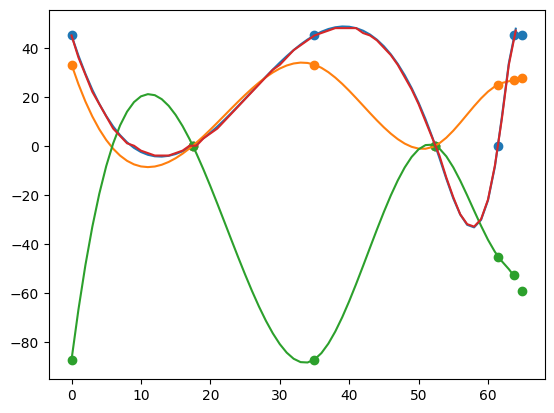

In [ ]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
cs1=CubicSpline(tcs,Qcs1)
cs2=CubicSpline(tcs,Qcs2)
cs3=CubicSpline(tcs,Qcs3)
print(tcs,Qcs1,Qcs2,Qcs3)
CS1=np.array(cs1(np.arange(0,tcs[-1])))
plt.plot(CS1)
plt.plot(cs2(np.arange(0,tcs[-1])))
plt.plot(cs3(np.arange(0,tcs[-1])))
CS1=np.array(cs1(np.arange(0,tcs[-1])),dtype=int)
plt.plot(CS1)
plt.scatter(tcs,Qcs1)
plt.scatter(tcs,Qcs2)
plt.scatter(tcs,Qcs3)

358


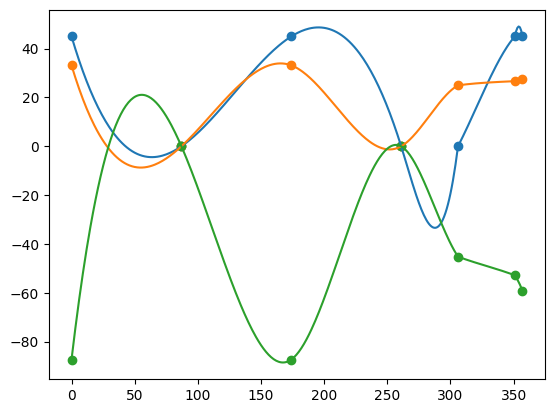

In [ ]:

print(len(STRQI))
plt.figure(1)
plt.plot(STRQI)
plt.scatter(taux,Qcs1)
plt.scatter(taux,Qcs2)
plt.scatter(taux,Qcs3)

#Matrices simbolicas

In [ ]:
#obtencion de parametros para CinINV
from sympy import Symbol, Matrix
C1 = Symbol('C1')
C2 = Symbol('C2')
cosq3 = Symbol('cosq3')
C4 = Symbol('C4')
C5 = Symbol('C5')
C6 = Symbol('C6')
S1 = Symbol('S1')
S2 = Symbol('S2')
S3 = Symbol('S3')
S4 = Symbol('S4')
S5 = Symbol('S5')
S6 = Symbol('S6')
L1 = Symbol('L1')
L2 = Symbol('L2')
L3 = Symbol('L3')
L4 = Symbol('L4')

A1=Matrix([[C1,0,S1,0],[S1,0,-C1,0],[0,1,0,L1],[0,0,0,1]])
A2=Matrix([[-S2,-C2,0,-L2*S2],[C2,-S2,0,L2*C2],[0,0,1,0],[0,0,0,1]])
A3=Matrix([[S3,0,cosq3,0],[-cosq3,0,S3,0],[0,-1,0,0],[0,0,0,1]])
A4=Matrix([[C4,0,S4,0],[S4,0,-C4,0],[0,1,0,L3],[0,0,0,1]])
A5=Matrix([[C5,0,-S5,0],[S5,0,C5,0],[0,-1,0,0],[0,0,0,1]])
A6=Matrix([[C6,-S6,0,0],[S6,C6,0,0],[0,0,1,L4],[0,0,0,1]])

T=A1*A2*A3*A4*A5*A6

R1=Matrix([[C1,0,S1],[S1,0,-C1],[0,1,0]])
R2=Matrix([[-S2,-C2,0],[C2,-S2,0],[0,0,1]])
R3=Matrix([[S3,0,cosq3],[-cosq3,0,S3],[0,-1,0]])
R4=Matrix([[C4,0,S4],[S4,0,-C4],[0,1,0]])
R5=Matrix([[C5,0,-S5],[S5,0,C5],[0,-1,0]])
R6=Matrix([[C6,-S6,0],[S6,C6,0],[0,0,1]])


nx = Symbol('nx')
ny = Symbol('ny')
nz = Symbol('nz')

ox = Symbol('ox')
oy = Symbol('oy')
oz = Symbol('oz')

ax = Symbol('ax')
ay = Symbol('ay')
az = Symbol('az')

NOA=Matrix([[nx,ox,ax],[ny,oy,ay],[nz,oz,az]])

R36=((R1*R2*R3).inv())*NOA
R36izq=R4*R5*R6
R46=(R4.inv())*R36
R46izq=R5*R6
R56=(R5.inv())*R46
R56izq=R6

#Despeje de q4

In [ ]:
R36

Matrix([
[  nx*(C1*C2*C3 - C1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + ny*(C2*C3*S1 - S1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + nz*(C2*S3 + C3*S2)/(C2**2*C3**2 + C2**2*S3**2 + C3**2*S2**2 + S2**2*S3**2),   ox*(C1*C2*C3 - C1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + oy*(C2*C3*S1 - S1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + oz*(C2*S3 + C3*S2)/(C2**2*C3**2 + C2**2*S3**2 + C3**2*S2**2 + S2**2*S3**2),   ax*(C1*C2*C3 - C1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 

In [ ]:
R36izq

Matrix([
[C4*C5*C6 - S4*S6, -C4*C5*S6 - C6*S4, -C4*S5],
[C4*S6 + C5*C6*S4,  C4*C6 - C5*S4*S6, -S4*S5],
[           C6*S5,            -S5*S6,     C5]])

In [ ]:
(R36[1,2]/R36[0,2]).factor()
#q4=np.arctan2(C1*ay-S1*ax,az*(C2*S3+cosq3*S2)+(C2*cosq3-S2*S3)*(ay*S1+ax*C1))

#az*(C2*S3+cosq3*S2)
#ay*(S1*(C2*cosq3-S2*S3))
#ax*(C1*(C2*cosq3-S2*S3))

(C2**2 + S2**2)*(C3**2 + S3**2)*(C1*ay - S1*ax)/(C1**2*C2*S3*az + C1**2*C3*S2*az + C1*C2*C3*ax - C1*S2*S3*ax + C2*C3*S1*ay + C2*S1**2*S3*az + C3*S1**2*S2*az - S1*S2*S3*ay)

In [ ]:
R36izq[1,2]/R36izq[0,2]

S4/C4

#Despeje de q5

In [ ]:
R46

Matrix([
[ C4*(nx*(C1*C2*C3 - C1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + ny*(C2*C3*S1 - S1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + nz*(C2*S3 + C3*S2)/(C2**2*C3**2 + C2**2*S3**2 + C3**2*S2**2 + S2**2*S3**2))/(C4**2 + S4**2) + S4*(C1*ny/(C1**2 + S1**2) - S1*nx/(C1**2 + S1**2))/(C4**2 + S4**2),  C4*(ox*(C1*C2*C3 - C1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + oy*(C2*C3*S1 - S1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + oz*(C2*S3 + C3*S2)/(C2**2*C3**2 + C2**2*S3**2 + C3**2*S2**2 + S2**2*S3

In [ ]:
R46izq

Matrix([
[C5*C6, -C5*S6, -S5],
[C6*S5, -S5*S6,  C5],
[  -S6,    -C6,   0]])

In [ ]:
R46izq[1,2]
#q5=np.arccos(-ax*C1*(C2*S3+cosq3*S2)-ay*S1*(C2*S3+cosq3*S2)+az*(C2*cosq3-S2*S3))

C5

In [ ]:
R46[1,2].factor()

#-ax*C1*(C2*S3+cosq3*S2)
#-ay*S1*(C2*S3+cosq3*S2)
#az* (C1C1(C2cosq3-S2S3)+S1S1(C2cosq3-S2S3))=az*(C2*cosq3-S2*S3)

(C1**2*C2*C3*az - C1**2*S2*S3*az - C1*C2*S3*ax - C1*C3*S2*ax + C2*C3*S1**2*az - C2*S1*S3*ay - C3*S1*S2*ay - S1**2*S2*S3*az)/((C1**2 + S1**2)*(C2**2 + S2**2)*(C3**2 + S3**2))

#Despeje de q6

In [ ]:
R56

Matrix([
[C5*(C4*(nx*(C1*C2*C3 - C1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + ny*(C2*C3*S1 - S1*S2*S3)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + nz*(C2*S3 + C3*S2)/(C2**2*C3**2 + C2**2*S3**2 + C3**2*S2**2 + S2**2*S3**2))/(C4**2 + S4**2) + S4*(C1*ny/(C1**2 + S1**2) - S1*nx/(C1**2 + S1**2))/(C4**2 + S4**2))/(C5**2 + S5**2) + S5*(nx*(-C1*C2*S3 - C1*C3*S2)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + ny*(-C2*S1*S3 - C3*S1*S2)/(C1**2*C2**2*C3**2 + C1**2*C2**2*S3**2 + C1**2*C3**2*S2**2 + C1**2*S2**2*S3**2 + C2**2*C3**2*S1**2 + C2**2*S1**2*S3**2 + C3**2*S1**2*S2**2 + S1**2*S2**2*S3**2) + nz*(C2*C3 - S2*S3)/(C2**2*C3**2 + C2**2*S3**2 + 

In [ ]:
R56izq

Matrix([
[C6, -S6, 0],
[S6,  C6, 0],
[ 0,   0, 1]])

In [ ]:
(R56[1,0]*(C1*C1+S1*S1)*(C2*C2+S2*S2)*(cosq3*cosq3+S3*S3)*(C4*C4+S4*S4)).factor()
#nx*(-C1C2cosq3S4 + C1S2S3S4 + C4S1(-2))=nx*(-2*C4*S1+C1*S4*(-C2*cosq3+S2*S3))
#ny*(C1C4-C2cosq3S1S4+S1S2S3S4)=ny*(C1*C4+S1*S4*(S2*S3-C2*cosq3))
#nz*(-C1C1S4(C2S3+cosq3S2)-S1S1S4(C2S3+cosq3S2))=-nz*S4*(C2*S3+cosq3*S2)

-C1**2*C2*S3*S4*nz - C1**2*C3*S2*S4*nz + C1*C2**2*C3**2*C4*ny + C1*C2**2*C4*S3**2*ny - C1*C2*C3*S4*nx + C1*C3**2*C4*S2**2*ny + C1*C4*S2**2*S3**2*ny + C1*S2*S3*S4*nx - C2**2*C3**2*C4*S1*nx - C2**2*C4*S1*S3**2*nx - C2*C3*S1*S4*ny - C2*S1**2*S3*S4*nz - C3**2*C4*S1*S2**2*nx - C3*S1**2*S2*S4*nz - C4*S1*S2**2*S3**2*nx + S1*S2*S3*S4*ny

In [ ]:
R56izq[1,0]
#q6=np.arcsin(nx*(-2*C4*S1+C1*S4*(-C2*cosq3+S2*S3))+ny*(C1*C4+S1*S4*(S2*S3-C2*cosq3))-nz*S4*(C2*S3+cosq3*S2))

S6